In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry
from gasmarketmodel.params import europe_frame
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2

In [2]:
country_names = {
    "Deutschland" : "Germany",
    "Niederlande" : "Netherlands",
    "Frankreich" : "France",
    "Schweiz" : "Switzerland",
    "Luxemburg" : "Luxembourg",
    "Belgien" : "Belgium",
    "Spanien" : "Spain",
    "Portugal" : "Portugal",
    "Italien" : "Italy",
    "Österreich" : "Austria",
    "Schweden" : "Sweden",
    "Finnland" : "Finland",
    "Dänemark" : "Denmark",
    "Polen" : "Poland",
    "Tschechien" : "Czechia",
    "Slowakei" : "Slovakia",
    "Litauen" : "Lithuania",
    "Lettland" : "Latvia",
    "Estland" : "Estonia",
    "Ungarn" : "Hungary",
    "Slowenien" : "Slovenia",
    "Kroatien" : "Croatia",
    "Rumänien" : "Romania",
    "Bulgarien" : "Bulgaria",
    "Griechenland" : "Greece",
    "Irland" : "Ireland",
    "UK" : "United Kingdom",
    "Malta" : "Malta",
    "Zypern" : "Cyprus",
    "Ukraine" : "Ukraine"
}

importers_list = [
    "Algeria",
    "Libya",
    "Norway",
    "Russia"
]

In [3]:
mapping_dict = {
    "Luxemburg": "Belux",
    "Belgien" : "Belux",
    "Niederlande": "Niederlande",
    "Frankreich": "Frankreich",
    "Spanien" : "Iberia",
    "Portugal": "Iberia",
    "Italien": "Italien",
    "Schweiz": "Schweiz",
    "Österreich": "Österreich",
    "Deutschland": "Deutschland",
    "Schweden": "Skandinavien",
    "Finnland": "Skandinavien",
    "Dänemark": "Dänemark",
    "Polen": "Polen",
    "Tschechien": "Tschechien",
    "Slowakei": "Slowakei",
    "Lettland": "Baltikum",
    "Litauen": "Baltikum",
    "Estland": "Baltikum",
    "Griechenland": "SEE",
    "Ungarn": "SEE",
    "Slowenien": "SEE",
    "Kroatien": "SEE",
    "Rumänien": "SEE",
    "Bulgarien": "SEE",
    "UK": "Ukeire",
    "Irland" : "Ukeire",
    "Malta": "Malta",
    "Zypern": "Zypern",
    "Ukraine": "Ukraine"
}

/home/flo/.pyenv/versions/3.8.6/envs/gasmarketmodel/lib/python3.8/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.overlay(


                                                       geometry
region                                                         
Baltikum      MULTIPOLYGON (((26.57613 55.55056, 26.55164 55...
Belux         POLYGON ((6.10570 50.09224, 6.09940 50.06413, ...
Deutschland   MULTIPOLYGON (((13.80436 48.69956, 13.81686 48...
Dänemark      MULTIPOLYGON (((10.50815 54.85493, 10.51857 54...
Frankreich    MULTIPOLYGON (((8.54949 42.24225, 8.55991 42.2...
Iberia        MULTIPOLYGON (((-2.43424 35.18523, -2.42939 35...
Italien       MULTIPOLYGON (((12.59832 35.49433, 12.59392 35...
Malta         MULTIPOLYGON (((14.56715 35.84561, 14.56178 35...
Niederlande   MULTIPOLYGON (((3.60467 51.39106, 3.70216 51.3...
Polen         POLYGON ((18.83743 49.52695, 18.83454 49.54762...
SEE           MULTIPOLYGON (((24.04640 34.84907, 24.04640 34...
Schweiz       POLYGON ((10.44854 46.83223, 10.44492 46.82324...
Skandinavien  MULTIPOLYGON (((15.70330 56.08942, 15.70362 56...
Slowakei      POLYGON ((22.53199 49.0557

/tmp/ipykernel_572/169827067.py:71: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")


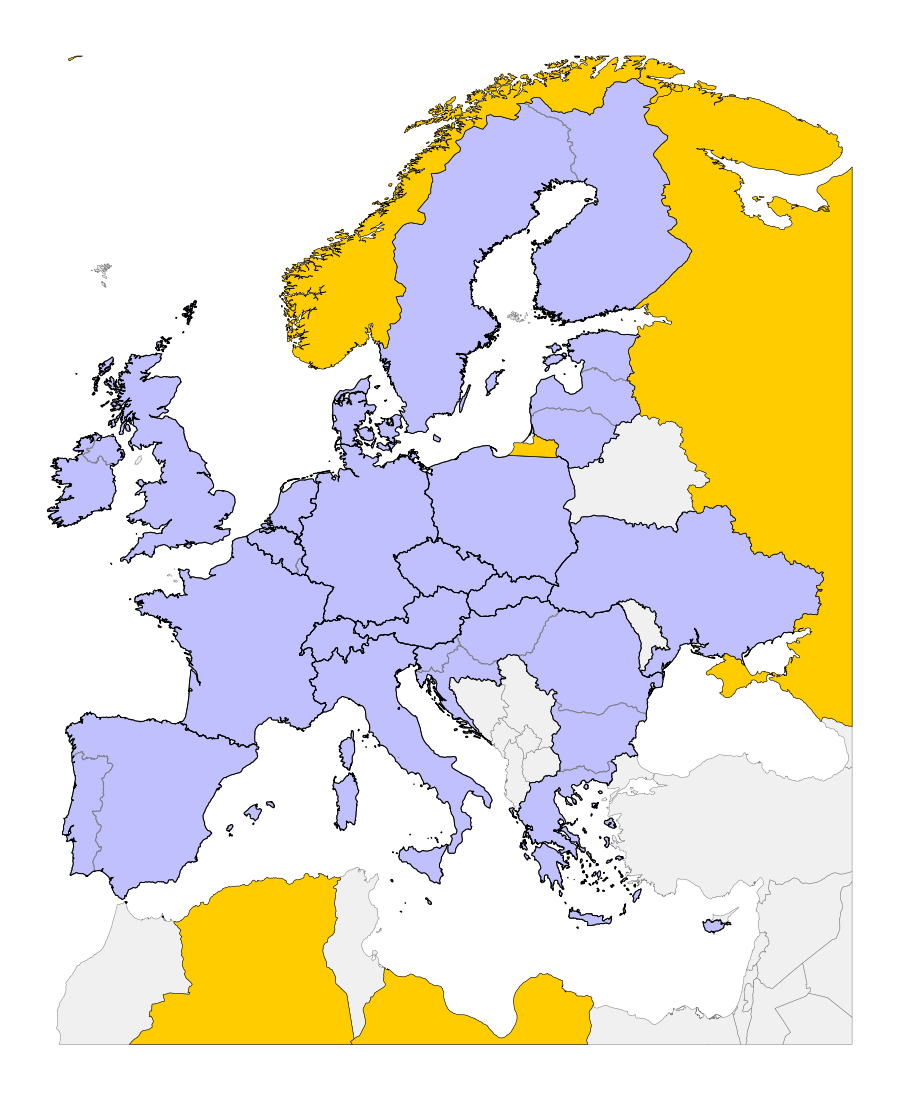

In [5]:
# Read in world data
world_gdf = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]]

# Restrict to countries within defined Europe rectangle
europe_gdf = world_gdf.overlay(europe_frame, how = "intersection")

# Create plot
fig, ax = plt.subplots(figsize = (20,20))

# Plot all countries in Europe rectangle
europe_gdf.plot(
    edgecolor = "grey",
    facecolor = (240/255, 240/255, 240/255),
    linewidth = 0.5,
    ax = ax
)

# Only countries relevant for study
country_gdf = europe_gdf.merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
# Plot them
country_gdf.plot(
    edgecolor = "grey",
    facecolor = (192/255, 192/255, 1),
    linewidth = 1,
    ax = ax
)

# Only regions relevant for study
regions_gdf = country_gdf.merge(
    pd.DataFrame.from_dict(
        mapping_dict,
        orient = "index",
        columns = ["region"]
    ).reset_index(),
    left_index = True,
    right_on = "index",
)[["geometry", "region"]].set_index("region").dissolve(by = "region")
print(regions_gdf)
# Plot them
regions_gdf.plot(
    edgecolor = "black",
    facecolor = "none",
    linewidth = 1,
    ax = ax
)

# Importers
importers_gdf = europe_gdf.merge(
    pd.DataFrame(importers_list, columns = ["Country"]),
    left_on = "ADMIN",
    right_on = "Country",
)[["Country", "geometry"]].set_index("Country")
# Plot them
importers_gdf.plot(
    edgecolor = "black",
    facecolor = (255/255, 204/255, 0/255),
    linewidth = 0.5,
    ax = ax
)

plt.axis("off")

data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
img = Image.fromarray(data[180:-230, 297:-301, :])
img = img.convert("RGBA")
newData = []
for item in img.getdata():
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("map_subs_colors_nolabels.png", "PNG")

#fig.savefig("map_subs_colors_nolabels.png", transparent = True)

In [45]:
europe_gdf["area"] = europe_gdf.geometry.area
europe_gdf.sort_values("area", ascending = False)

/tmp/ipykernel_572/3931364541.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe_gdf["area"] = europe_gdf.geometry.area


,ADMIN,geometry,area
11,Russia,"MULTIPOLYGON (((41.97969 43.18866, 41.94827 43...",235.321571
17,Sweden,"MULTIPOLYGON (((20.67546 69.01817, 20.79535 69...",78.560879
25,Turkey,"MULTIPOLYGON (((41.89637 37.15428, 41.47977 37...",72.334360
50,Algeria,"POLYGON ((-5.07125 30.04039, -4.95943 30.12426...",70.988305
8,Ukraine,"MULTIPOLYGON (((31.82584 52.10406, 31.85871 52...",70.541235
...,...,...,...
65,Guernsey,"MULTIPOLYGON (((-2.17032 49.72875, -2.17032 49...",0.009181
48,San Marino,"POLYGON ((12.39958 43.90322, 12.38563 43.92453...",0.006761
49,Monaco,"POLYGON ((7.43285 43.73985, 7.41796 43.73090, ...",0.002105
57,Gibraltar,"POLYGON ((-5.33877 36.14112, -5.33991 36.12983...",0.000370


## Ukraine

POLYGON ((33.66044905138261 46.14818427648316, 33.6714563305452 46.17295065684732, 33.66162330786932 46.21017049727061, 33.67027978528387 46.21810560059299, 33.71572629013616 46.1957430352129, 33.75520664577004 46.1933715535543, 33.80187817383865 46.20270585898817, 33.84621612577354 46.19570512968795, 33.89288765294282 46.17703651882027, 33.94422633417798 46.15370075478597, 33.99089786134721 46.13036499075167, 34.02590150784829 46.11636353305056, 34.06790588275027 46.10469565058378, 34.10524310448568 46.09536134514991, 34.16124893798809 46.09069419288267, 34.20091973675642 46.10002849831653, 34.23592338235818 46.09769492128356, 34.27326060499291 46.08369346358245, 34.30126352129446 46.06969200498202, 34.33393359166189 46.06969200498202, 34.36193650796343 46.05569054638158, 34.37827154269752 46.03002120621369, 34.39227300129795 46.00901901921236, 34.41094161216563 45.98801683131171, 34.43427737619993 45.97168179657763, 34.46461386953445 45.95534676184354, 34.50428466740345 45.9506796086

/tmp/ipykernel_572/2989043070.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  russia_gdf["area"] = russia_gdf.geometry.area


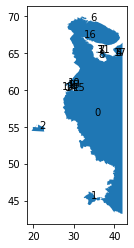

In [65]:
russia_gdf = europe_gdf.explode(index_parts = False)
russia_gdf = russia_gdf[russia_gdf["ADMIN"] == "Russia"]
russia_gdf["area"] = russia_gdf.geometry.area
russia_gdf.sort_values("area", ascending = False, inplace = True)
russia_gdf = russia_gdf.reset_index()[["geometry"]]
russia_gdf["labelpoint"] = russia_gdf["geometry"].apply(lambda x: x.representative_point().coords[:][0])

russia_gdf.plot()

for idx, row in russia_gdf.iterrows():
    plt.annotate(text = idx, xy = row["labelpoint"])
    
print(russia_gdf.loc[1].values[0])